In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('D:/pandas Practice/Advertising.csv')
data.set_index('Company')

,TV,radio,newspaper,sales
Company,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [3]:
X = data.iloc[:,2]
Y = data.iloc[:,4]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

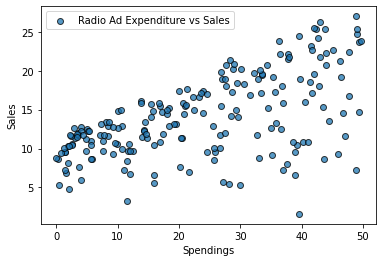

In [4]:
plt.scatter(X,Y,edgecolors='black',alpha=0.75,linewidth=1,label='Radio Ad Expenditure vs Sales')
plt.legend()
plt.xlabel('Spendings')
plt.ylabel('Sales')
plt.show()

In [5]:
#This function updates w and b for one epoch.
def update_wb(X,Y,w,b,alpha):
    dC_dw = 0.0
    dC_db = 0.0
    N = len(X)
    for i in range(N):
        dC_dw += -2*X[i]*(Y[i] - (w*X[i] + b))
        dC_db += -2*(Y[i] - (w*X[i] + b))
    w = w - alpha*(1/float(N))*dC_dw
    b = b - alpha*(1/float(N))*dC_db
    return w,b

In [6]:
#Calculate Mean Squared Error loss function.
def avg_loss(X,Y,w,b):
    N = len(X)
    total_error = 0.0
    for i in range(N):
        total_error += (Y[i] - (w*X[i] + b))**2
    mean_error = total_error/float(N)
    return mean_error

In [7]:
def train(X,Y,w,b,alpha,epochs):
    for e in range(epochs):
        w,b = update_wb(X,Y,w,b,alpha)
        if e % 400 ==0:
            print(f'Epoch:{e}, Loss: {avg_loss(X,Y,w,b)}')
    return w,b

In [8]:
#Calculate optimal model parameters w and b for a specific Learning Rate and epoch count.
train(X,Y,0,0,0.001,2000)

Epoch:0, Loss: 92.32078294903626
Epoch:400, Loss: 33.79131790081576
Epoch:800, Loss: 27.9918542960729
Epoch:1200, Loss: 24.33481690722147
Epoch:1600, Loss: 22.028754937538633


(0.29232378287432703, 6.376122133949339)

In [10]:
#Predict the target variable for a new x-variable.
w,b = train(X,Y,0,0,0.001,3200)
def predict(x_new,w,b):
    f_x = w*x_new + b
    return f_x
predict(23,w,b)

Epoch:0, Loss: 92.32078294903626
Epoch:400, Loss: 33.79131790081576
Epoch:800, Loss: 27.9918542960729
Epoch:1200, Loss: 24.33481690722147
Epoch:1600, Loss: 22.028754937538633
Epoch:2000, Loss: 20.57459375662496
Epoch:2400, Loss: 19.657625883308423
Epoch:2800, Loss: 19.07940244306619


13.533661642380022